## Sagnac Frequency - Compare Drift of Rings

## Imports

In [1]:
import os
import gc
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime, read, Trace, Stream, read_inventory
from scipy.signal import hilbert


In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [3]:
# from functions.load_beat import __load_beat
from functions.load_sagnac_beat_data import __load_sagnac_beat_data
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.mlti_intervals_to_NaN import __mlti_intervals_to_NaN
from functions.load_mlti import __load_mlti
from functions.smoothing import __smooth
from functions.interpolate_nan import __interpolate_nan

## Configurations

In [4]:
config = {}

# case = 21
# config['tbeg'] = UTCDateTime("2023-12-01 00:00")
# config['tend'] = UTCDateTime("2023-12-31 00:00")
# Zlower, Zupper = 553.49, 553.51
# Ulower, Uupper = 302.4, 302.52
# Vlower, Vupper = 447.42, 447.46

# case = 22
# config['tbeg'] = UTCDateTime("2024-02-09 00:00")
# config['tend'] = UTCDateTime("2024-02-12 12:00")
# Zlower, Zupper = 553.555, 553.565
# Ulower, Uupper = 302.40, 302.45
# Vlower, Vupper = 447.745, 447.755

# case = 23
# config['tbeg'] = UTCDateTime("2024-01-01 00:00")
# config['tend'] = UTCDateTime("2024-02-20 00:00")
# Zlower, Zupper = 553.48, 553.58
# Ulower, Uupper = 302.39, 302.475
# Vlower, Vupper = 447.7, 447.80

# case = 24
# config['tbeg'] = UTCDateTime("2023-12-01 00:00")
# config['tend'] = UTCDateTime("2024-01-15 00:00")
# Zlower, Zupper = 553.49, 553.51
# Ulower, Uupper = 302.4, 302.52
# Vlower, Vupper = 447.42, 447.46

case = 24
config['tbeg'] = UTCDateTime("2024-02-01 00:00")
config['tend'] = UTCDateTime("2024-03-20 00:00")
Zlower, Zupper = 553.555, 553.568
Ulower, Uupper = 302.4, 302.48
Vlower, Vupper = 447.73, 447.755


config['path_to_sds'] = archive_path+"romy_archive/"

## path to Sagnac Beat data
config['path_to_autodata'] = archive_path+f"romy_autodata/"

config['path_to_figs'] = data_path+"sagnac_frequency/figures/"

In [5]:
beatU = __load_sagnac_beat_data(config['tbeg'], config['tend'], "U", config['path_to_autodata'])
beatZ = __load_sagnac_beat_data(config['tbeg'], config['tend'], "Z", config['path_to_autodata'])
beatV = __load_sagnac_beat_data(config['tbeg'], config['tend'], "V", config['path_to_autodata'])

In [51]:
read_pickle(archive_path+"romy_autodata/2024/RU/FJU_20240301.pkl")

,times_utc,times_utc_sec,times_mjd,fj,f1,f2,pz,p1,p2,ac_z,ac_1,ac_2,dc_z,dc_1,dc_2,contrast_z,contrast_1,contrast_2
0,2024-03-18T23:57:30.000000Z,120.0,60387.998264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-03-18T23:58:30.000000Z,120.0,60387.998958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-03-18T23:59:30.000000Z,120.0,60387.999653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-03-19T00:00:30.000000Z,120.0,60388.000347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-03-19T00:01:30.000000Z,120.0,60388.001042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2024-03-19T23:52:30.000000Z,120.0,60388.994792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,2024-03-19T23:53:30.000000Z,120.0,60388.995486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,2024-03-19T23:54:30.000000Z,120.0,60388.996181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,2024-03-19T23:55:30.000000Z,120.0,60388.996875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


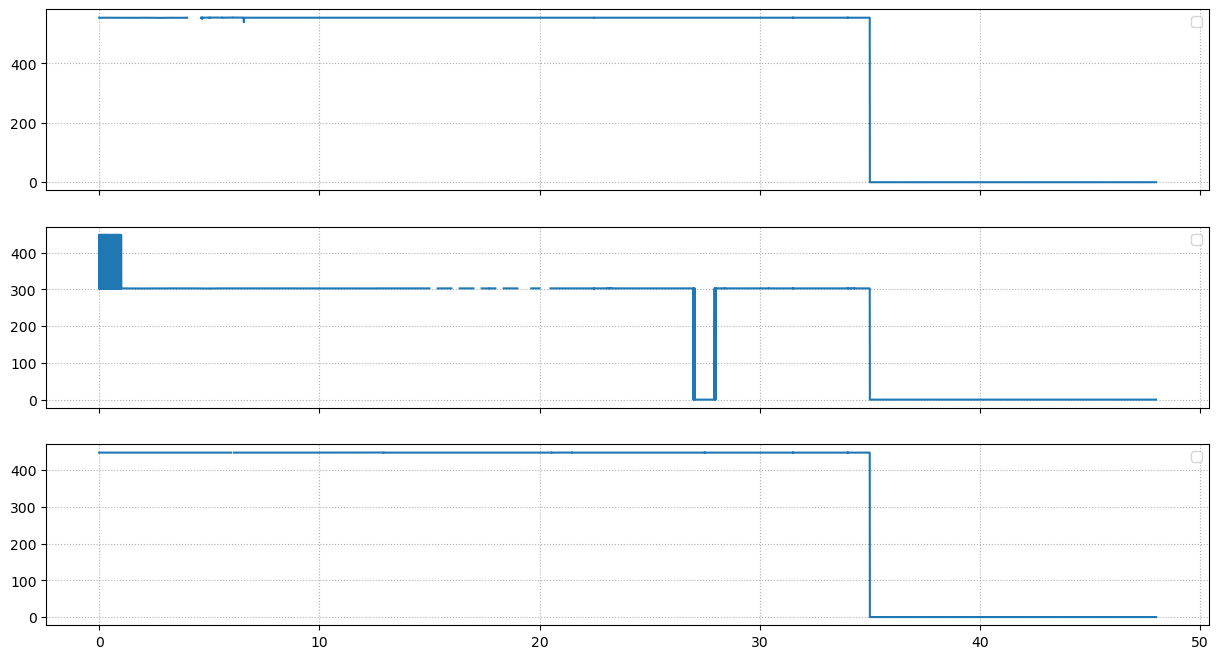

In [6]:
def __makeplot():

    Nrow, Ncol = 3, 1

    font = 12

    time_scaling = 1/86400

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

    ax[0].plot(beatZ.times_utc_sec*time_scaling, beatZ.fj)
    # ax[0].set_ylim(553.49, 553.52)
    ax[0].ticklabel_format(useOffset=False)

    ax[1].plot(beatU.times_utc_sec*time_scaling, beatU.fj)
    # ax[1].set_ylim(302.4, 302.5)
    ax[1].ticklabel_format(useOffset=False)

    ax[2].plot(beatV.times_utc_sec*time_scaling, beatV.fj)
    # ax[2].set_ylim(447.4, 447.6)
    ax[2].ticklabel_format(useOffset=False)

    # ax[2].axhline(np.nanpercentile(beatV.fj, 99))
    # ax[2].axhline(np.nanpercentile(beatV.fj, 1))

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1)

    plt.show();
    return fig

fig = __makeplot();


## Remove breakdown periods

In [7]:
times = [("2023-12-04T09:10", "2023-12-04T18:02"),
         ("2023-12-20T06:10", "2023-12-20T12:01")]

for t1, t2 in times:
    beatU['fj'] = np.where((beatU.times_utc > t1) & (beatU.times_utc < t2), np.nan, beatU['fj'])

# beatU['fj'] = np.nan_to_num(beatU['fj'], nan=np.nanmedian(beatU['fj']))

In [8]:
times = [("2024-01-01T04:00", "2024-01-01T22:51"),
         ("2024-01-03T14:20", "2024-01-06T00:00"),
         ("2023-12-19T09:40", "2023-12-19T15:21")]

for t1, t2 in times:
    beatV['fj'] = np.where((beatV.times_utc > t1) & (beatV.times_utc < t2), np.nan, beatV['fj'])

# beatV['fj'] = np.nan_to_num(beatV['fj'], nan=np.nanmedian(beatV['fj']))

In [9]:
times = [("2023-12-07T00:10", "2023-12-08T18:05")]

for t1, t2 in times:
    beatZ['fj'] = np.where((beatZ.times_utc > t1) & (beatZ.times_utc < t2), np.nan, beatZ['fj'])

# beatZ['fj'] = np.nan_to_num(beatZ['fj'], nan=np.nanmedian(beatZ['fj']))

In [10]:
# beatU['fj'] = np.where((beatU.times_utc < "2023-12-20T07:00:30") & (beatU.fj < 302.4), np.nan, beatU.fj)
beatU['fj'] = np.where((beatU.fj < 302.4), np.nan, beatU.fj)

## cut off outliers manually
beatU['fj'] = np.where((beatU.times_utc > "2023-12-18T20:40") & (beatU.times_utc < "2023-12-19T05:00") & (beatU.fj < 302.48), np.nan, beatU.fj)


In [11]:
# beatZ['fj'] = np.where((beatZ.fj > 553.515), np.nan, beatZ.fj)

In [12]:
# i1, i2 = 25000, 25500

# # print(beatZ.times_utc.iloc[i1], beatZ.times_utc.iloc[i2])
# # plt.plot(beatZ.times_utc_sec.iloc[i1:i2], beatZ.fj.iloc[i1:i2])

# print(beatU.times_utc.iloc[i1], beatU.times_utc.iloc[i2])
# plt.plot(beatU.times_utc_sec.iloc[i1:i2], beatU.fj.iloc[i1:i2])
# # plt.plot(beatU.times_utc_sec.iloc[i1:i2], beatU.fj_nan.iloc[i1:i2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


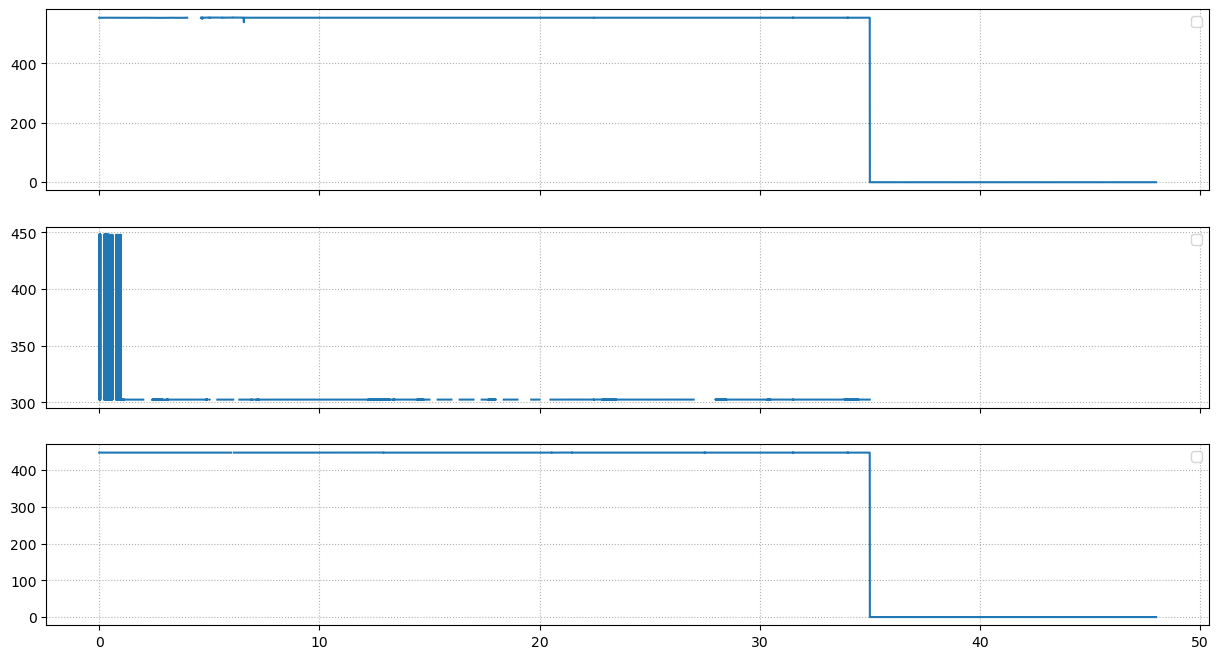

In [13]:
fig = __makeplot();

## Load Maintenance LXX log

In [14]:
from functions.load_lxx import __load_lxx

lxx =__load_lxx(config['tbeg'], config['tend'], archive_path)

In [15]:
from functions.get_lxx_intervals import __get_lxx_intervals

lxx_t1, lxx_t2 = __get_lxx_intervals(lxx.datetime)

## Remove MLTI times

In [16]:
mltiU = __load_mlti(config['tbeg'], config['tend'], "U", archive_path)

In [17]:
mltiZ = __load_mlti(config['tbeg'], config['tend'], "Z", archive_path)

In [18]:
mltiV = __load_mlti(config['tbeg'], config['tend'], "V", archive_path)

In [19]:
mltiU_t1, mltiU_t2 = __get_mlti_intervals(mltiU.time_utc)

In [20]:
mltiZ_t1, mltiZ_t2 = __get_mlti_intervals(mltiZ.time_utc)

In [21]:
mltiV_t1, mltiV_t2 = __get_mlti_intervals(mltiV.time_utc)

In [22]:
# # df, mlti, mlti_t1, mlti_t2  = beatU, mltiU, mltiU_t1, mltiU_t2
# # df, mlti, mlti_t1, mlti_t2  = beatV, mltiV, mltiV_t1, mltiV_t2
# df, mlti, mlti_t1, mlti_t2  = beatZ, mltiZ, mltiZ_t1, mltiZ_t2


# time_axis = df.times_utc_sec-df.times_utc_sec.iloc[0]
# plt.plot(time_axis, df.fj, zorder=2)

# # for m in mlti.time_utc:
# #     plt.axvline((UTCDateTime(m)-config['tbeg'])/86400, color="red", zorder=0, alpha=0.5)

# miny, maxy = min(df.fj), max(df.fj)
# for t1, t2 in zip(mlti_t1, mlti_t2):
#     plt.fill_betweenx([miny, maxy], t1-config['tbeg'], t2-config['tbeg'], color="red", alpha=0.5;

In [23]:
# i1, i2 = 20400, 26819

# print(beatV.times_utc.iloc[i1], beatV.times_utc.iloc[i2])
# plt.plot(beatV.times_utc_sec.iloc[i1:i2], beatV.fj.iloc[i1:i2])

In [24]:
beatU = __mlti_intervals_to_NaN(beatU, "fj", "times_utc", mltiU_t1, mltiU_t2, t_offset_sec=180)
beatV = __mlti_intervals_to_NaN(beatV, "fj", "times_utc", mltiV_t1, mltiV_t2, t_offset_sec=180)
beatZ = __mlti_intervals_to_NaN(beatZ, "fj", "times_utc", mltiZ_t1, mltiZ_t2, t_offset_sec=180)

## Interpolate NaN values

In [25]:
beatU['fj_inter'] = __interpolate_nan(np.array(beatU.fj_nan))
beatV['fj_inter'] = __interpolate_nan(np.array(beatV.fj_nan))
beatZ['fj_inter'] = __interpolate_nan(np.array(beatZ.fj_nan))

## Smoothing

In [26]:
n_minutes = 15*60

beatU['fj_smooth'] = __smooth(beatU.fj_inter, n_minutes)
beatV['fj_smooth'] = __smooth(beatV.fj_inter, n_minutes)
beatZ['fj_smooth'] = __smooth(beatZ.fj_inter, n_minutes)

## Plotting

/tmp/ipykernel_680967/3616689058.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[Nrow-1].set_xticklabels(tcklbls)


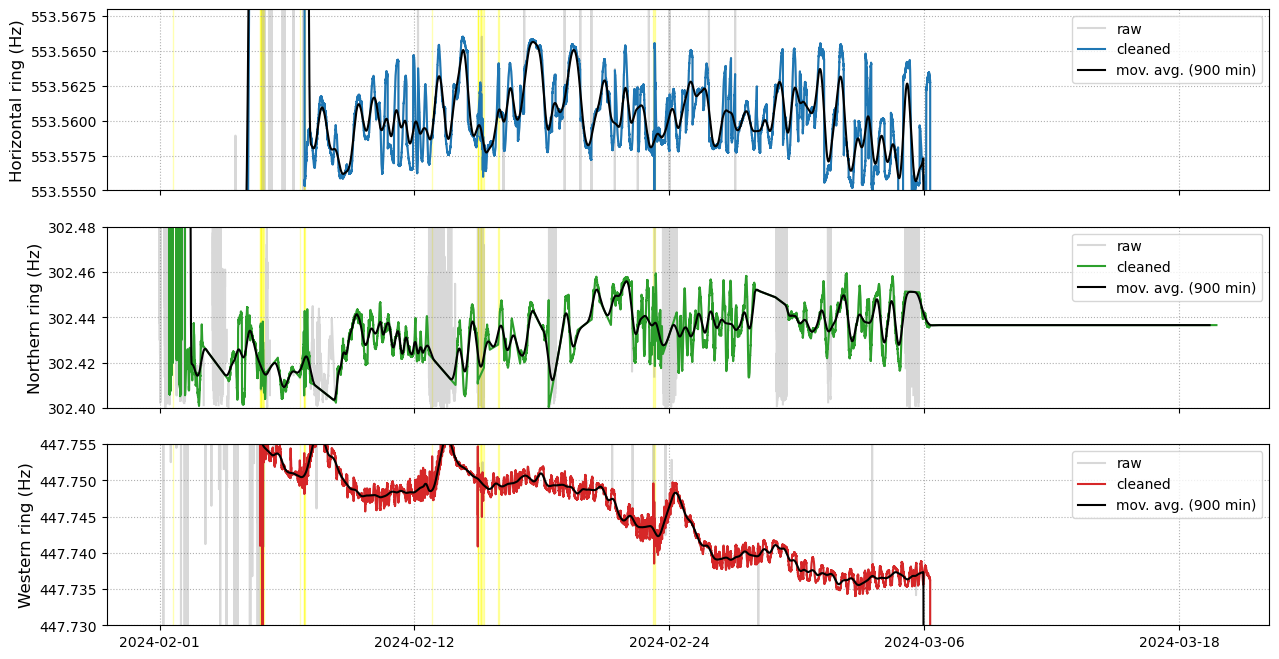

In [27]:
def __makeplot():

    Nrow, Ncol = 3, 1

    font = 12

    ref_date = UTCDateTime(str(beatV.times_utc.iloc[0])[:10])

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

    # time_scaling = 1/86400
    time_scaling = 1

    ax[0].plot(beatZ.times_utc_sec*time_scaling, beatZ.fj, color="tab:grey", alpha=0.3, label="raw")
    ax[0].plot(beatZ.times_utc_sec*time_scaling, beatZ.fj_inter, color="tab:blue", label="cleaned")
    ax[0].plot(beatZ.times_utc_sec*time_scaling, beatZ.fj_smooth, color="k", label=f"mov. avg. ({n_minutes} min)")
    ax[0].set_ylim(Zlower, Zupper)
    ax[0].ticklabel_format(useOffset=False)
    ax[0].set_ylabel("Horizontal ring (Hz)", fontsize=font)

    ax[1].plot(beatU.times_utc_sec*time_scaling, beatU.fj, color="tab:grey", alpha=0.3, label="raw")
    ax[1].plot(beatU.times_utc_sec*time_scaling, beatU.fj_inter, color="tab:green", label="cleaned")
    ax[1].plot(beatU.times_utc_sec*time_scaling, beatU.fj_smooth, color="k", label=f"mov. avg. ({n_minutes} min)")
    ax[1].set_ylim(Ulower, Uupper)
    ax[1].ticklabel_format(useOffset=False)
    ax[1].set_ylabel("Northern ring (Hz)", fontsize=font)

    ax[2].plot(beatV.times_utc_sec*time_scaling, beatV.fj, color="tab:grey", alpha=0.3, label="raw")
    ax[2].plot(beatV.times_utc_sec*time_scaling, beatV.fj_inter, color="tab:red", label="cleaned")
    ax[2].plot(beatV.times_utc_sec*time_scaling, beatV.fj_smooth, color="k", label=f"mov. avg. ({n_minutes} min)")
    ax[2].set_ylim(Vlower, Vupper)
    ax[2].set_ylim()

    ax[2].ticklabel_format(useOffset=False)
    ax[2].set_ylabel("Western ring (Hz)", fontsize=font)

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1)

        ## add maintenance times
        for lx1, lx2 in zip(lxx_t1, lxx_t2):
            lx1_sec = lx1-UTCDateTime(ref_date)
            lx2_sec = lx2-UTCDateTime(ref_date)
            ax[_n].fill_betweenx([-1000, 1000], lx1_sec, lx2_sec, color="yellow", alpha=0.3)

    # ax[2].set_xlabel("Time (days)", fontsize=font)

    ## add dates to x-axis
    tcks = ax[Nrow-1].get_xticks()
    tcklbls = [str(UTCDateTime(ref_date+t).date) for t in tcks]
    ax[Nrow-1].set_xticklabels(tcklbls)



    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"BeatDrift_Case{case}smoothed.png", format="png", dpi=150, bbox_inches='tight')


In [28]:
beatU['fj_reduced'] = beatU['fj_smooth'] - np.abs(np.nanmean(beatU['fj_smooth'].iloc[:500]))
beatV['fj_reduced'] = beatV['fj_smooth'] - np.abs(np.nanmean(beatV['fj_smooth'].iloc[:500]))
beatZ['fj_reduced'] = beatZ['fj_smooth'] - np.abs(np.nanmean(beatZ['fj_smooth'].iloc[:500]))

In [29]:
def __sagnac_to_tilt(data, ring):

    from numpy import pi, sqrt, arccos, deg2rad, arcsin

    dip = {"Z":0, "U":109.5, "V":70.5, "W":70.5}

    L = {"Z":11.2, "U":12, "V":12, "W":12}

    ## Scale factor
    S = (sqrt(3)*L[ring])/(3*632.8e-9)

    ## ROMY latitude
    lat = 48.162941

    ## nominal Earth rotation
    omegaE = 2*pi/86400

    return arcsin(data /omegaE /S) - deg2rad(lat) - deg2rad(dip[ring])

In [30]:
beatZ['tilt'] = __sagnac_to_tilt(beatZ['fj_reduced'], "Z")
beatU['tilt'] = __sagnac_to_tilt(beatU['fj_reduced'], "U")
beatV['tilt'] = __sagnac_to_tilt(beatV['fj_reduced'], "V")

beatU['tilt_reduced'] = beatU.tilt - np.nanmean(beatU.tilt.iloc[:1440])
beatV['tilt_reduced'] = beatV.tilt - np.nanmean(beatV.tilt.iloc[:1440])
beatZ['tilt_reduced'] = beatZ.tilt - np.nanmean(beatZ.tilt.iloc[:1440])

In [31]:
def __makeplot():

    Nrow, Ncol = 2, 1

    font = 12

    time_scaling = 1/86400
    tilt_scaling = 1e6

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

    ax[0].plot(beatZ.times_utc_sec*time_scaling, beatZ.fj_reduced, color="tab:blue", label=f"RZ (mov. avg. {n_minutes} min)")
    ax[0].plot(beatV.times_utc_sec*time_scaling, beatV.fj_reduced, color="tab:red", label=f"RV (mov. avg. {n_minutes} min)")
    ax[0].plot(beatU.times_utc_sec*time_scaling, beatU.fj_reduced, color="tab:green", label=f"RU (mov. avg. {n_minutes} min)")

    ax[0].ticklabel_format(useOffset=False)
    ax[0].set_ylabel("$\Delta f$ (Hz)", fontsize=font)

    ax[1].plot(beatZ.times_utc_sec*time_scaling, beatZ.tilt_reduced*tilt_scaling, color="tab:blue", label=f"RZ (mov. avg. {n_minutes} min)")
    ax[1].plot(beatV.times_utc_sec*time_scaling, beatV.tilt_reduced*tilt_scaling, color="tab:red", label=f"RV (mov. avg. {n_minutes} min)")
    ax[1].plot(beatU.times_utc_sec*time_scaling, beatU.tilt_reduced*tilt_scaling, color="tab:green", label=f"RU (mov. avg. {n_minutes} min)")


    ax[1].set_ylabel("N-S Tilt ($\mu$rad)", fontsize=font)

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1)

    ax[0].set_ylim(-0.04, 0.07)

    ## add dates to x-axis
    ref_date = UTCDateTime(beatZ.times_utc.iloc[0][:10])
    tcks = ax[Nrow-1].get_xticks()
    tcklbls = [str(UTCDateTime(ref_date+t).date) for t in tcks]
    ax[Nrow-1].set_xticklabels(tcklbls)

    plt.show();
    return fig

# fig = __makeplot();


## Rotate to ZNE

In [32]:
tr_beatU = Trace()
tr_beatU.data = np.array(beatU.fj_reduced)
tr_beatU.stats.delta = 60
tr_beatU.stats.starttime = UTCDateTime(str(beatU.times_utc.iloc[0]))
tr_beatU.stats.network, tr_beatU.stats.station, tr_beatU.stats.channel = "BW", "ROMY", "LJU"
# tr_beatU.plot();

tr_beatV = Trace()
tr_beatV.data = np.array(beatV.fj_reduced)
tr_beatV.stats.delta = 60
tr_beatV.stats.starttime = UTCDateTime(str(beatV.times_utc.iloc[0]))
tr_beatV.stats.network, tr_beatV.stats.station, tr_beatV.stats.channel = "BW", "ROMY", "LJV"
# tr_beatV.plot();

tr_beatZ = Trace()
tr_beatZ.data = np.array(beatZ.fj_reduced)
tr_beatZ.stats.delta = 60
tr_beatZ.stats.starttime = UTCDateTime(str(beatZ.times_utc.iloc[0]))
tr_beatZ.stats.network, tr_beatZ.stats.station, tr_beatZ.stats.channel = "BW", "ROMY", "LJZ"
# tr_beatZ.plot();

st_beat = Stream(traces=[tr_beatU, tr_beatV, tr_beatZ])

etime = min(st_beat[0].stats.endtime, st_beat[1].stats.endtime, st_beat[2].stats.endtime)
st_beat = st_beat.trim(st_beat[0].stats.starttime, etime)

st_beat

3 Trace(s) in Stream:
BW.ROMY..LJU | 2024-02-01T00:00:30.000000Z - 2024-03-20T00:03:30.000000Z | 60.0 s, 69124 samples
BW.ROMY..LJV | 2024-02-01T00:00:30.000000Z - 2024-03-20T00:03:30.000000Z | 60.0 s, 69124 samples
BW.ROMY..LJZ | 2024-02-01T00:00:30.000000Z - 2024-03-20T00:03:30.000000Z | 60.0 s, 69124 samples

In [33]:
from functions.rotate_romy_ZUV_ZNE import __rotate_romy_ZUV_ZNE

In [34]:
config['path_to_inventory'] = root_path+"Documents/ROMY/stationxml_ringlaser/dataless/"

romy_inv = read_inventory(config['path_to_inventory']+"dataless.seed.BW_ROMY")

st_beat_zne = __rotate_romy_ZUV_ZNE(st_beat, romy_inv)

# st_beat_zne.plot();

/tmp/ipykernel_680967/695098481.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[Nrow-1].set_xticklabels(tcklbls)


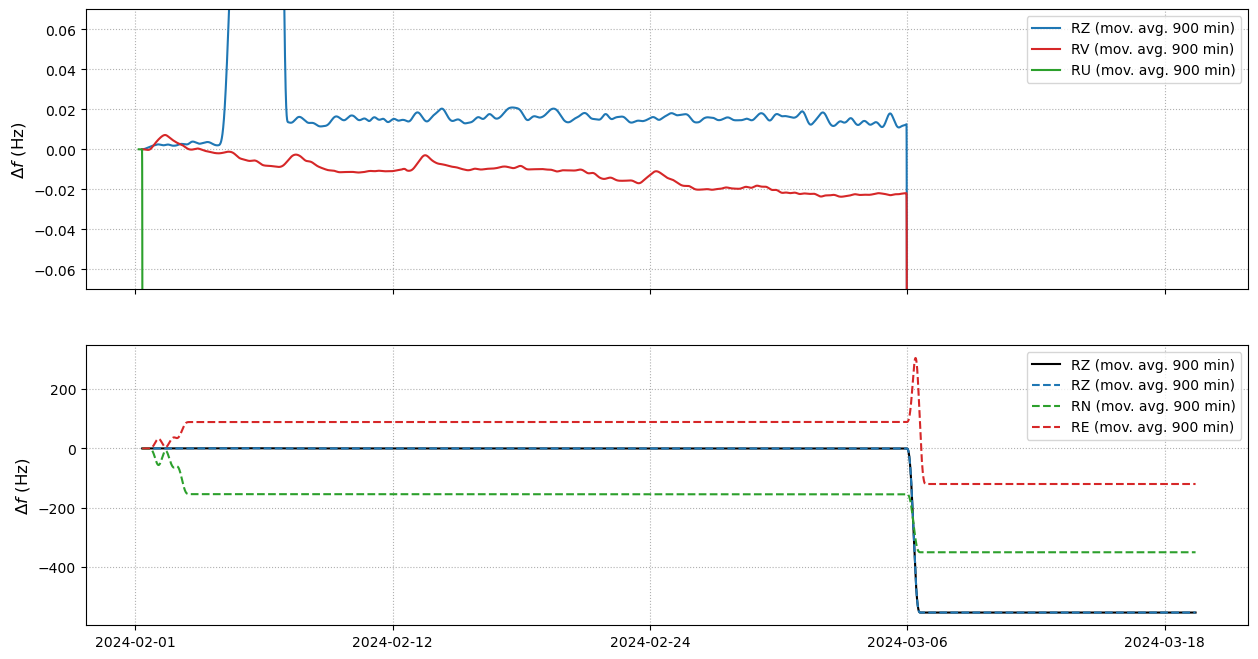

In [35]:
def __makeplot():

    Nrow, Ncol = 2, 1

    font = 12

    ref_date = UTCDateTime(str(beatZ.times_utc.iloc[0])[:10])

    time_scaling = 1
    tilt_scaling = 1e6

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

    ax[0].plot(beatZ.times_utc_sec*time_scaling, beatZ.fj_reduced, color="tab:blue", label=f"RZ (mov. avg. {n_minutes} min)")
    ax[0].plot(beatV.times_utc_sec*time_scaling, beatV.fj_reduced, color="tab:red", label=f"RV (mov. avg. {n_minutes} min)")
    ax[0].plot(beatU.times_utc_sec*time_scaling, beatU.fj_reduced, color="tab:green", label=f"RU (mov. avg. {n_minutes} min)")

    ax[0].ticklabel_format(useOffset=False)
    ax[0].set_ylabel("$\Delta f$ (Hz)", fontsize=font)


    # ax[1].plot(beatZ.times_utc_sec*time_scaling, beatZ.tilt_reduced*tilt_scaling, color="tab:blue", label=f"RZ (mov. avg. {n_minutes} min)")
    # ax[1].plot(beatV.times_utc_sec*time_scaling, beatV.tilt_reduced*tilt_scaling, color="tab:red", label=f"RV (mov. avg. {n_minutes} min)")
    # ax[1].plot(beatU.times_utc_sec*time_scaling, beatU.tilt_reduced*tilt_scaling, color="tab:green", label=f"RU (mov. avg. {n_minutes} min)")

    ax[1].plot(st_beat.select(channel="*Z")[0].times(reftime=ref_date),
               st_beat.select(channel="*Z")[0].data,
               color="black", label=f"RZ (mov. avg. {n_minutes} min)")

    ax[1].plot(st_beat_zne.select(channel="*Z")[0].times(reftime=ref_date),
               st_beat_zne.select(channel="*Z")[0].data,
               color="tab:blue", label=f"RZ (mov. avg. {n_minutes} min)", ls="--")
    ax[1].plot(st_beat_zne.select(channel="*N")[0].times(reftime=ref_date),
               st_beat_zne.select(channel="*N")[0].data,
               color="tab:green", label=f"RN (mov. avg. {n_minutes} min)", ls="--")
    ax[1].plot(st_beat_zne.select(channel="*E")[0].times(reftime=ref_date),
               st_beat_zne.select(channel="*E")[0].data,
               color="tab:red", label=f"RE (mov. avg. {n_minutes} min)", ls="--")


    # ax[1].set_ylabel("N-S Tilt ($\mu$rad)", fontsize=font)
    ax[1].set_ylabel("$\Delta f$ (Hz)", fontsize=font)

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1)

    ax[0].set_ylim(-0.07, 0.07)
    ax[0].set_ylim(-0.07, 0.07)

    ## add dates to x-axis
    tcks = ax[Nrow-1].get_xticks()
    tcklbls = [str(UTCDateTime(ref_date+t).date) for t in tcks]
    ax[Nrow-1].set_xticklabels(tcklbls)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"BeatDrift_Case{case}_smoothed_ZNE.png", format="png", dpi=150, bbox_inches='tight')


In [36]:
def __sagnac_to_rads(data, ring):

    from numpy import pi, sqrt, arccos, deg2rad, sin

    dip = {"Z":0, "U":109.5, "V":70.5, "W":70.5}

    L = {"Z":11.2, "U":12, "V":12, "W":12}

    ## Scale factor
    S = (sqrt(3)*L[ring])/(3*632.8e-9)

    ## ROMY latitude
    lat = 48.162941

    ## nominal Earth rotation
    omegaE = 2*pi/86400

    return data /S /sin(deg2rad(lat+dip[ring]))

In [37]:

st_rad = st_beat.copy()

for tr in st_rad:
    tr.data = __sagnac_to_rads(tr.data, tr.stats.channel[-1])
    tr.data = __interpolate_nan(tr.data)

st_rad = st_rad.integrate(method='cumtrapz')

st_rad = __rotate_romy_ZUV_ZNE(st_rad, romy_inv)

# st_rad.plot(equal_scale=False)

/tmp/ipykernel_680967/3158631129.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[Nrow-1].set_xticklabels(tcklbls)


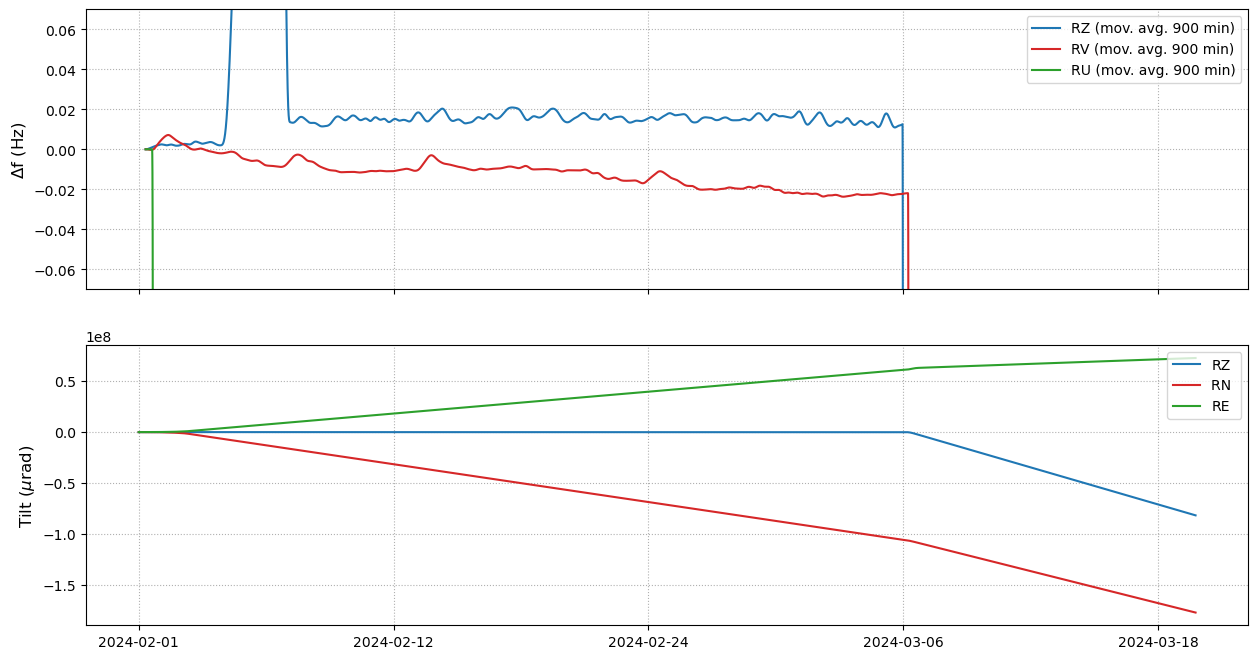

In [38]:
def __makeplot():

    Nrow, Ncol = 2, 1

    font = 12

    ref_date = UTCDateTime(str(beatZ.times_utc.iloc[0])[:10])

    time_scaling = 1
    tilt_scaling = 1e6

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

    ax[0].plot(st_beat.select(channel="*Z")[0].times()*time_scaling,
               st_beat.select(channel="*Z")[0].data,
               color="tab:blue", label=f"RZ (mov. avg. {n_minutes} min)")
    ax[0].plot(st_beat.select(channel="*V")[0].times()*time_scaling,
               st_beat.select(channel="*V")[0].data,
               color="tab:red", label=f"RV (mov. avg. {n_minutes} min)")
    ax[0].plot(st_beat.select(channel="*U")[0].times()*time_scaling,
               st_beat.select(channel="*U")[0].data,
               color="tab:green", label=f"RU (mov. avg. {n_minutes} min)")

    ax[0].ticklabel_format(useOffset=False)
    ax[0].set_ylabel("$\Delta$f (Hz)", fontsize=font)


    ax[1].plot(st_rad.select(channel="*Z")[0].times()*time_scaling,
               st_rad.select(channel="*Z")[0].data*tilt_scaling,
               color="tab:blue", label=f"RZ")
    ax[1].plot(st_rad.select(channel="*N")[0].times()*time_scaling,
               st_rad.select(channel="*N")[0].data*tilt_scaling,
               color="tab:red", label=f"RN ")
    ax[1].plot(st_rad.select(channel="*E")[0].times()*time_scaling,
               st_rad.select(channel="*E")[0].data*tilt_scaling,
               color="tab:green", label=f"RE")


    ax[1].set_ylabel("$\Delta f$ (Hz)", fontsize=font)
    ax[1].set_ylabel("Tilt ($\mu$rad)", fontsize=font)

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1)

    ax[0].set_ylim(-0.07, 0.07)
    ax[0].set_ylim(-0.07, 0.07)

    ## add dates to x-axis
    tcks = ax[Nrow-1].get_xticks()
    tcklbls = [str(UTCDateTime(ref_date+t).date) for t in tcks]
    ax[Nrow-1].set_xticklabels(tcklbls)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"BeatDrift_Case{case}_smoothed_asTilt.png", format="png", dpi=150, bbox_inches='tight')


In [39]:
st_rad

3 Trace(s) in Stream:
BW.ROMY..LJN | 2024-02-01T00:00:30.000000Z - 2024-03-20T00:03:30.000000Z | 60.0 s, 69124 samples
BW.ROMY..LJE | 2024-02-01T00:00:30.000000Z - 2024-03-20T00:03:30.000000Z | 60.0 s, 69124 samples
BW.ROMY..LJZ | 2024-02-01T00:00:30.000000Z - 2024-03-20T00:03:30.000000Z | 60.0 s, 69124 samples

In [40]:
def __get_vector_movement(N, E, Twin=3600, ref_date=None, plot=False):

    from numpy import median, sqrt, arctan, degrees, mod, array, append, rad2deg, nan, ma, deg2rad

    dt = N[0].stats.delta
    t1 = 0

    Ndata = N[0].data
    Edata = E[0].data

    if ma.is_masked(Ndata):
        Ndata = ma.filled(Ndata, fill_value=nan)
    if ma.is_masked(Edata):
        Edata = ma.filled(Edata, fill_value=nan)

    vnorm, vdir, timeline = [], [], []
    while (t1 + Twin) < N[0].stats.npts*dt:

        Nmed = median(Ndata[int(t1/dt):int((t1+Twin)/dt)])
        Emed = median(Edata[int(t1/dt):int((t1+Twin)/dt)])


        vnorm.append(sqrt(Nmed**2 + Emed**2))

        if Nmed > 0 and Emed > 0:
            vdir.append(90-abs(rad2deg(arctan(abs(Nmed/Emed)))))

        elif Nmed < 0 and Emed > 0:
            vdir.append(90+abs(rad2deg(arctan(abs(Nmed/Emed)))))

        elif Nmed < 0 and Emed < 0:
            vdir.append(270-abs(rad2deg(arctan(abs(Nmed/Emed)))))

        elif Nmed > 0 and Emed < 0:
            vdir.append(270+abs(rad2deg(arctan(abs(Nmed/Emed)))))

        else:
            vdir.append(nan)

        t1 += Twin/2

        timeline.append(t1)

    if ref_date:
        time_offset = abs(UTCDateTime(ref_date) - N[0].stats.starttime)
    else:
        time_offset = 0

    vnorm = array(vnorm)
    vdir = array(vdir)
    timeline = (array(timeline) + time_offset)/3600 ## in hours


    ## Plotting ------------------------------------
    if plot:

        from numpy import deg2rad, arange, linspace
        import matplotlib.pyplot as plt

        vnorm = vnorm
        vdirection = vdir

        ## times to days
        times = timeline /24

        time_min = min(times)
        time_max = max(times)

        ## Plot --------------------------------------------------------------------------
        fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'), figsize=(5, 5))

        font = 12

        cmap = plt.get_cmap('viridis')

        vscaling, vunit = 1e3, "mrad"

        ## convert degrees to radians for plotting as polar!
        p0 = ax.scatter(deg2rad(vdirection), vnorm*vscaling, c=times, cmap=cmap,
                        vmin=time_min, vmax=time_max, alpha=0.75, s=4, zorder=2)

        cbar = plt.colorbar(p0, ax=ax,  pad=0.1, orientation='vertical', fraction=0.1, shrink=.8)

        if ref_date:
            cbar.set_label('Time (days)', rotation=90, fontsize=font, labelpad=10)
        else:
            cbar.set_label(f'Time from {ref_date} (days)', rotation=90, fontsize=font, labelpad=10)

        ## set new colorbar ticks
        # ref_time = config['tbeg']
        # nticks = [str((ref_time+time_min+t*86400).date) for t in cbar.get_ticks()]
        # cbar.set_ticklabels(nticks)

        vmax = round(max(vnorm*vscaling) * 1.1, 0)

        ax.set_ylim(0, vmax)
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)

        ax.text(deg2rad(25), vmax*1.2, f"({vunit})")
        ax.set_rgrids(linspace(0., vmax, 5), angle=25., zorder=0)

        ax.set_title("Tilt of ROMY structure", fontsize=font)

        plt.show();

    return timeline, vdir, vnorm

In [41]:
def __makeplot_normal_vector_movement(times, vdirection, vnorm, ref_date=None):

    from numpy import deg2rad, arange, linspace
    import matplotlib.pyplot as plt

    ## times to days
    times = times /24

    time_min = min(times)
    time_max = max(times)

    ## Plot --------------------------------------------------------------------------
    fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'), figsize=(5, 5))

    font = 12

    cmap = plt.get_cmap('viridis')

    vscaling, vunit = 1e3, "mrad"

    ## convert degrees to radians for plotting as polar!
    p0 = ax.scatter(deg2rad(vdirection), vnorm*vscaling, c=times, cmap=cmap,
                    vmin=time_min, vmax=time_max, alpha=0.75, s=4, zorder=2)

    cbar = plt.colorbar(p0, ax=ax,  pad=0.1, orientation='vertical', fraction=0.1, shrink=.8)

    if ref_date is not None:
        cbar.set_label('Time (days)', rotation=90, fontsize=font, labelpad=10)
    else:
        cbar.set_label(f'Time from {ref_date} (days)', rotation=90, fontsize=font, labelpad=10)

    ## set new colorbar ticks
    # ref_time = config['tbeg']
    # nticks = [str((ref_time+time_min+t*86400).date) for t in cbar.get_ticks()]
    # cbar.set_ticklabels(nticks)

    vmax = round(max(vnorm*vscaling) * 1.1, 0)

    ax.set_ylim(0, vmax)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)

    ax.text(deg2rad(25), vmax*1.2, f"({vunit})")
    ax.set_rgrids(linspace(0., vmax, 5), angle=25., zorder=0)

    ax.set_title("Tilt of ROMY structure", fontsize=font)

    plt.show();
    return fig

In [42]:
twindow = 3600  ## seconds

ttimes, vector_direction, vector_norm = __get_vector_movement(st_rad.select(channel="*N"),
                                                              st_rad.select(channel="*E"),
                                                              Twin=twindow,
                                                              plot=False,
                                                              )


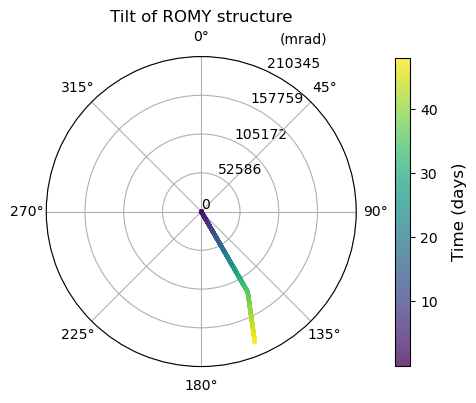

In [43]:

fig = __makeplot_normal_vector_movement(ttimes, vector_direction, vector_norm, ref_date=st_rad[0].stats.starttime.date)

fig.savefig(config['path_to_figs']+f"BeatDrift_Case{case}_vector_movement.png", format="png", dpi=150, bbox_inches='tight')


## Tides

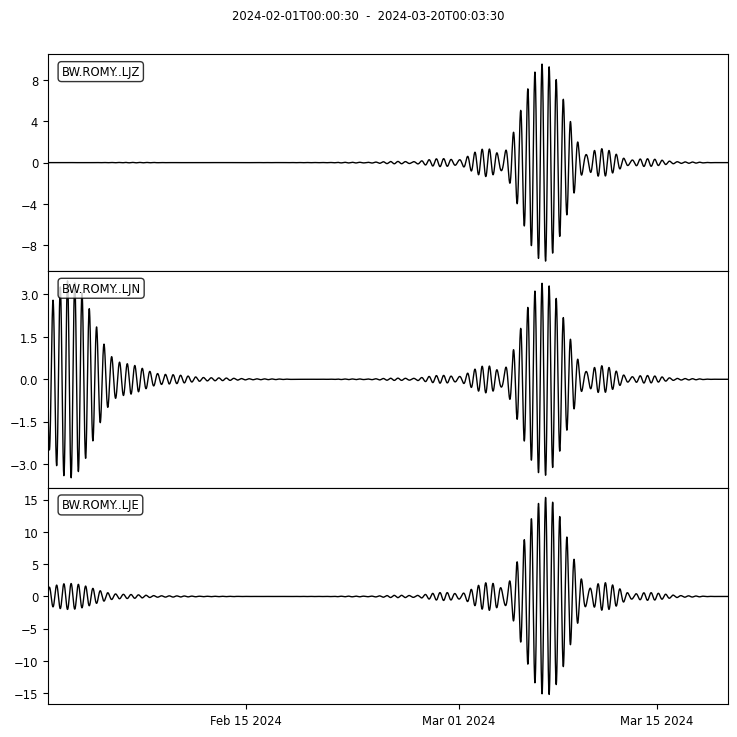

In [44]:
st_beat_zne_tide = st_beat_zne.copy();

for tr in st_beat_zne_tide:
    tr.data = __interpolate_nan(tr.data)

## daily
# f1 = 1/(25*3600)
# f2 = 1/(23*3600)

## sub-daily
f1 = 1/(13*3600)
f2 = 1/(11*3600)

# st_beat_zne_tide.detrend("linear")
# st_beat_zne_tide.taper(0.2)
st_beat_zne_tide.filter("bandpass", freqmin=f1, freqmax=f2, corners=4, zerophase=True)

st_beat_zne_tide.plot(equal_scale=False);


### Load Tilt Data

In [45]:
from andbro__read_sds import __read_sds
from andbro__readYaml import __readYaml
from functions.conversion_to_tilt import __conversion_to_tilt

In [46]:
path_to_tilt = data_path+"TiltmeterDataBackup/Tilt_downsampled/"
path_to_tilt = archive_path+"romy_archive/"

# sta, cha, name = "TROMY", "MA", "TROMY"
sta, cha, name = "DROMY", "LA", "BROMY"

tilt =  __read_sds(path_to_tilt, f"BW.{sta}..{cha}T", config['tbeg']-600, config['tend']+600)
tilt += __read_sds(path_to_tilt, f"BW.{sta}..{cha}N", config['tbeg']-600, config['tend']+600)
tilt += __read_sds(path_to_tilt, f"BW.{sta}..{cha}E", config['tbeg']-600, config['tend']+600)

## tiltmeter configurations
confTilt = __readYaml(root_path+"Documents/ROMY/tiltmeter/", "tiltmeter.conf")

tilt = __conversion_to_tilt(tilt, confTilt[f'{name}'])

tilt = tilt.trim(config['tbeg'], config['tend'])

tilt.plot(equal_scale=False);

gc.collect();

 -> failed to obtain waveforms!
 -> failed to obtain waveforms!



KeyboardInterrupt



In [ ]:
tides = Stream()

tides += st_rad.copy()
tides += tilt.copy()

tides = tides.resample(0.005, no_filter=False);

# f1, f2 = 1/(15*3600), 1/(11*3600)
# f1, f2 = 1/(25*3600), 1/(23*3600)

# tides = tides.detrend("simple")
# tides = tides.taper(0.01)
# tides = tides.filter("bandpass", freqmin=f1, freqmax=f2, corners=4, zerophase=True)

# tides.merge();

tides.plot(equal_scale=False);

In [ ]:
def __makeplot_tides():


    f1_subdaily, f2_subdaily = 1/(13*3600), 1/(11*3600)

    f1_daily, f2_daily = 1/(25*3600), 1/(23*3600)

    _detrend="simple"
    _taper = 0.05
    corners = 2

    tiltmeter="TROMY"

    tides_daily = tides.copy()
    tides_daily = tides_daily.detrend(_detrend)
    tides_daily = tides_daily.taper(_taper, type="cosine")
    tides_daily = tides_daily.filter("bandpass", freqmin=f1_daily, freqmax=f2_daily, corners=corners, zerophase=False)
    # tides_daily = tides_daily.filter("bandpass", freqmin=f1_daily, freqmax=f2_daily, corners=corners, zerophase=True)

    tides_subdaily = tides.copy()
    tides_subdaily = tides_subdaily.detrend(_detrend)
    tides_subdaily = tides_subdaily.taper(_taper, type="cosine")
    tides_subdaily = tides_subdaily.filter("bandpass", freqmin=f1_subdaily, freqmax=f2_subdaily, corners=corners, zerophase=False)
    # tides_subdaily = tides_subdaily.filter("bandpass", freqmin=f1_subdaily, freqmax=f2_subdaily, corners=corners, zerophase=True)


    Nrow, Ncol = 2, 2

    font = 12

    time_scaling, time_unit = 1/86400, "days"
    tilt_scaling, tilt_unit = 1e9, "nrad"

    ref_time = config['tbeg']-86400

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

    plt.subplots_adjust(hspace=0.1)

    ax[0,0].plot(tides_subdaily.select(station=tiltmeter, channel="*N")[0].times(reftime=ref_time)*time_scaling,
                 tides_subdaily.select(station=tiltmeter, channel="*N")[0].data*tilt_scaling,
                 color="black", label=f"N-S {tiltmeter}", lw=1)

    ax[1,0].plot(tides_subdaily.select(station=tiltmeter, channel="*E")[0].times(reftime=ref_time)*time_scaling,
                 tides_subdaily.select(station=tiltmeter, channel="*E")[0].data*tilt_scaling,
                 color="black", label=f"E-W {tiltmeter}", lw=1)

    ax[0,1].plot(tides_daily.select(station=tiltmeter, channel="*N")[0].times(reftime=ref_time)*time_scaling,
                 tides_daily.select(station=tiltmeter, channel="*N")[0].data*tilt_scaling,
                 color="black", label=f"N-S {tiltmeter}", lw=1)

    ax[1,1].plot(tides_daily.select(station=tiltmeter, channel="*E")[0].times(reftime=ref_time)*time_scaling,
                 tides_daily.select(station=tiltmeter, channel="*E")[0].data*tilt_scaling,
                 color="black", label=f"E-W {tiltmeter}", lw=1)

    ax00 = ax[0,0].twinx()
    ax10 = ax[1,0].twinx()
    ax01 = ax[0,1].twinx()
    ax11 = ax[1,1].twinx()


    ax00.plot(tides_subdaily.select(station="ROMY", channel="*N")[0].times(reftime=ref_time)*time_scaling,
                 tides_subdaily.select(station="ROMY", channel="*N")[0].data*tilt_scaling,
                 color="darkred", label="N-S (ring)", lw=1)

    ax10.plot(tides_subdaily.select(station="ROMY", channel="*E")[0].times(reftime=ref_time)*time_scaling,
                 tides_subdaily.select(station="ROMY", channel="*E")[0].data*tilt_scaling,
                 color="darkred", label="E-W (ring)", lw=1)

    ax01.plot(tides_daily.select(station="ROMY", channel="*N")[0].times(reftime=ref_time)*time_scaling,
                 tides_daily.select(station="ROMY", channel="*N")[0].data*tilt_scaling,
                 color="darkred", label="N-S (ring)", lw=1)

    ax11.plot(tides_daily.select(station="ROMY", channel="*E")[0].times(reftime=ref_time)*time_scaling,
                 tides_daily.select(station="ROMY", channel="*E")[0].data*tilt_scaling,
                 color="darkred", label="E-W (ring)", lw=1)


    ax[0,0].set_ylabel(f"Tilt ({tilt_unit})", fontsize=font)
    ax[1,0].set_ylabel(f"Tilt ({tilt_unit})", fontsize=font)
    ax01.set_ylabel(f"Tilt ({tilt_unit})", fontsize=font, color="darkred")
    ax11.set_ylabel(f"Tilt ({tilt_unit})", fontsize=font, color="darkred")

    ax[1,0].set_xlabel(f"Time (days) from {config['tbeg'].date} {config['tbeg'].time} UTC", fontsize=font)
    ax[1,1].set_xlabel(f"Time (days) from {config['tbeg'].date} {config['tbeg'].time} UTC", fontsize=font)

    ax[0,0].set_ylim(-60, 60)
    ax[0,1].set_ylim(-40, 40)
    ax[1,0].set_ylim(-100, 100)
    ax[1,1].set_ylim(-50, 50)

    ax[0,0].set_title(f"T={round(1/f2_subdaily/3600,1)} - {round(1/f1_subdaily/3600,1)}h", fontsize=font+1)
    ax[0,1].set_title(f"T={round(1/f2_daily/3600,1)} - {round(1/f1_daily/3600,1)}h", fontsize=font+1)

    ticks = []
    for _i in range(Nrow):
        for _j in range(Ncol):
            ax[_i,_j].grid(ls=":", zorder=0)
            ax[_i,_j].legend(loc=1)
            ticks.append(ax[_i,_j].get_yticks())


    for ax in [ax00, ax10, ax01, ax11]:
        ax.tick_params(axis='y', colors='darkred')
        ax.legend(loc=4)

    ax00.set_yticks(np.linspace(ax00.get_yticks()[0], ax00.get_yticks()[-1], len(ticks[0])))
    ax10.set_yticks(np.linspace(ax10.get_yticks()[0], ax10.get_yticks()[-1], len(ticks[2])))
    ax01.set_yticks(np.linspace(ax01.get_yticks()[0], ax01.get_yticks()[-1], len(ticks[1])))
    ax11.set_yticks(np.linspace(ax11.get_yticks()[0], ax11.get_yticks()[-1], len(ticks[3])))


#     ## add dates to x-axis
#     ref_date = UTCDateTime(config['tbeg'])
#     tcks = ax[Nrow-1].get_xticks()
#     tcklbls = [str(UTCDateTime(ref_date+t).date) for t in tcks]
#     ax[Nrow-1].set_xticklabels(tcklbls)

    plt.show();
    return fig

fig = __makeplot_tides();

